In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import csv
from pandas import DataFrame,date_range
import matplotlib.dates as mdates

In [2]:
# Creating conversion relationships for CO and NO2
X = [1,2,8,20,40,75,150,300]
Y = [0.72,0.7,0.6,0.5,0.4,0.3,0.2,0.09]
inv_polyCO = np.poly1d(np.polyfit(Y,X,4))
X2 = [10,20,30,40,90,200,700]
Y2 = [3.2,4.3,6,8.2,30,160,2500]
inv_polyNO2 = np.poly1d(np.polyfit(Y2,X2,4))

In [3]:
# Read in some data from ride
SCK1 = pd.read_csv('SCK_rides/Mar30_SCK1.csv')

# Raw Data $K\Omega$

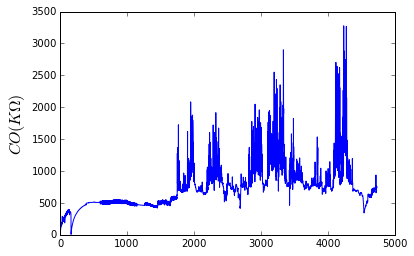

In [4]:
plt.plot(SCK1[' Carbon Monxide ( kOhm) '])
plt.ylabel('$CO (K\Omega)$', fontsize=16)

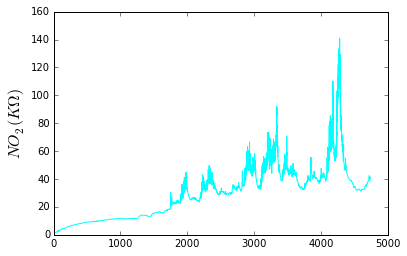

In [5]:
plt.plot(SCK1[' Nitrogen Dioxide ( kOhm) '],c='cyan') 
plt.ylabel('$NO_2 (K\Omega)$', fontsize=16)

# Removing $NO_2$ slope (detrending)

### METHOD 1: Using slope from actual ride

 
0.01137 x + 2.926


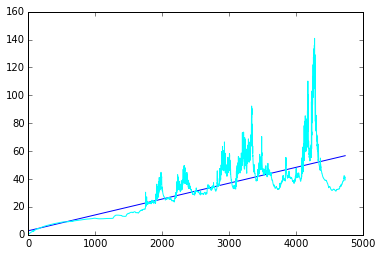

In [6]:
NO2_raw = SCK1[' Nitrogen Dioxide ( kOhm) ']
count = np.linspace(0,len(NO2_raw),len(NO2_raw))
poly = np.poly1d(np.polyfit(count,NO2_raw,1))
print poly
plt.plot(poly(count))
plt.plot(SCK1[' Nitrogen Dioxide ( kOhm) '],c='cyan') 

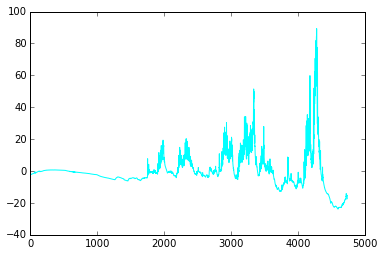

In [7]:
# new data
plt.plot(count,NO2_raw-poly(count),c='cyan') 

### METHOD 2: Read in some test data and chopping it up to a window that fits data

In [8]:
Mar28 = pd.read_csv('SCKtests/MCOMofficetestMar28/Mar28officetest_SCK1.csv')
M28_NO2 = Mar28[' Nitrogen Dioxide ( kOhm) ']

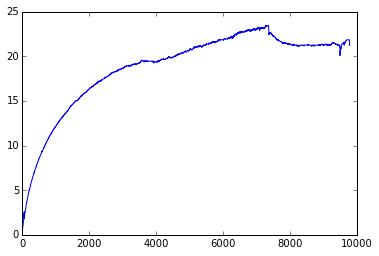

In [9]:
plt.plot(M28_NO2)

In [10]:
print NO2_raw.shape
print M28_NO2[2500:7231].shape
M28_new = M28_NO2[2500:7231]

(4731,)
(4731,)


 
0.001131 x + 17.94


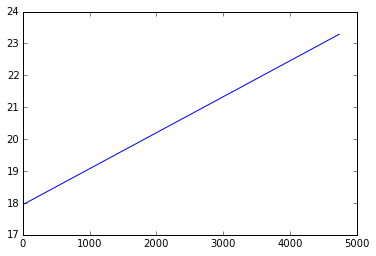

In [11]:
# Using slope from test
M28count = np.linspace(0,len(M28_new),len(M28_new))
M28poly = np.poly1d(np.polyfit(M28count,M28_new,1))
print M28poly
plt.plot(M28poly(M28count))

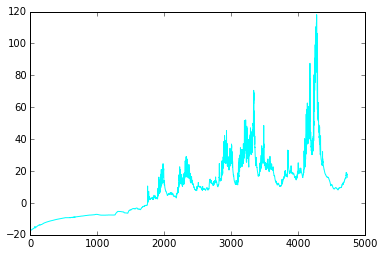

In [12]:
plt.plot(count,NO2_raw-M28poly(count),c='cyan') 

### I like method 2 better

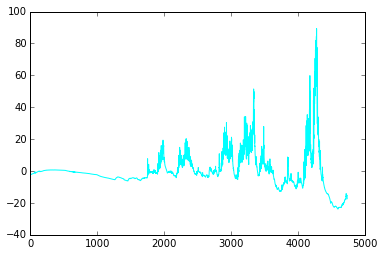

In [13]:
det_NO2 = NO2_raw-poly(count)
plt.plot(det_NO2,c='cyan')

# Applying $K\Omega$ / ppm relation

In [14]:
def makeR0_CO(Rs,R0,yaxis_name):
    R = Rs/R0
    ppm = inv_polyCO(R)
    plt.plot(ppm)
    plt.ylabel(yaxis_name, fontsize=16)
    plt.title(R0)
    return ppm

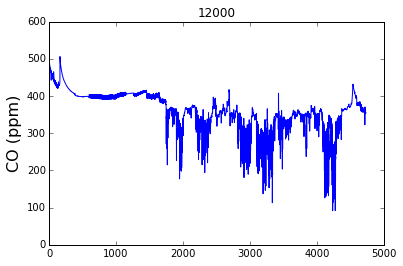

In [17]:
CO_12000 = makeR0_CO(SCK1[' Carbon Monxide ( kOhm) '],12000,'CO (ppm)')

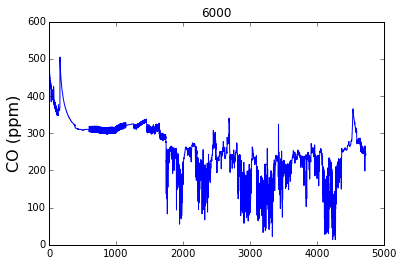

In [16]:
CO_6000 = makeR0_CO(SCK1[' Carbon Monxide ( kOhm) '],6000,'CO (ppm)')

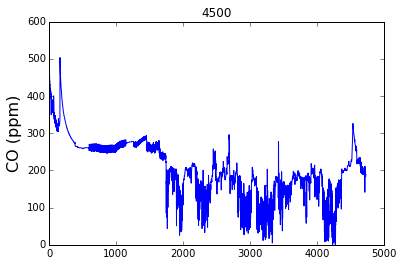

In [15]:
CO_4500 = makeR0_CO(SCK1[' Carbon Monxide ( kOhm) '],4500,'CO (ppm)')

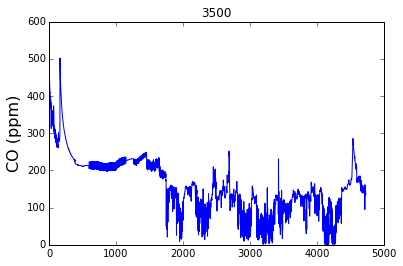

In [157]:
CO_3500 = makeR0_CO(SCK1[' Carbon Monxide ( kOhm) '],3500,'CO (ppm)')

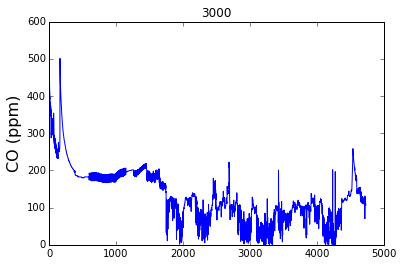

In [158]:
CO_3000 = makeR0_CO(SCK1[' Carbon Monxide ( kOhm) '],3000,'CO (ppm)')

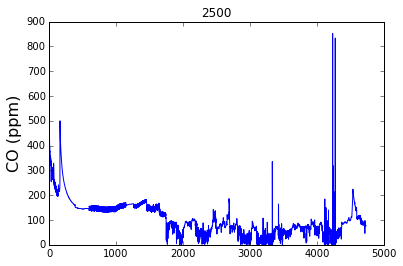

In [159]:
CO_2500 = makeR0_CO(SCK1[' Carbon Monxide ( kOhm) '],2500,'CO (ppm)')

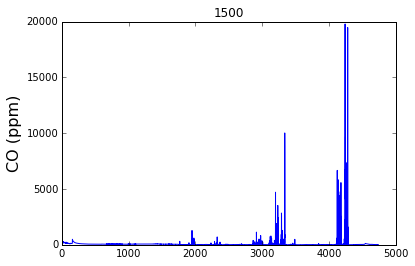

In [160]:
CO_1500 = makeR0_CO(SCK1[' Carbon Monxide ( kOhm) '],1500,'CO (ppm)')

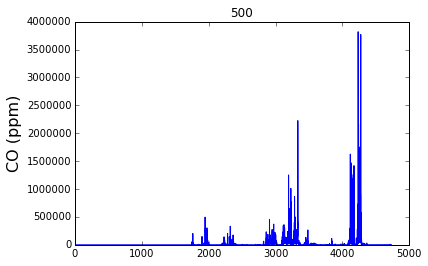

In [161]:
CO_500 = makeR0_CO(SCK1[' Carbon Monxide ( kOhm) '],500,'CO (ppm)')

In [219]:
def makeR0_NO2(Rs,R0,yaxis_name):
    R = Rs/R0
    print R.describe()
    ppm = inv_polyNO2(R)
    plt.plot(ppm,c='cyan')
    plt.ylabel(yaxis_name, fontsize=16)
    plt.title(R0)
    return ppm

count    4.731000e+03
mean    -5.106416e-17
std      5.632982e-02
min     -1.195443e-01
25%     -2.254023e-02
50%     -5.268185e-03
75%      6.603745e-03
max      4.465914e-01
dtype: float64


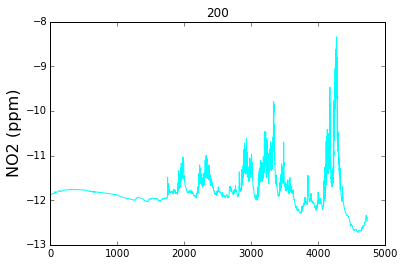

In [220]:
CO_200 = makeR0_NO2(det_NO2,200,'NO2 (ppm)')

count    4.731000e+03
mean    -8.410567e-17
std      9.388304e-02
min     -1.992404e-01
25%     -3.756705e-02
50%     -8.780308e-03
75%      1.100624e-02
max      7.443190e-01
dtype: float64


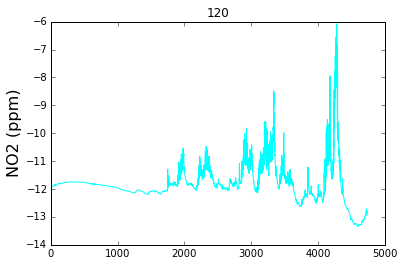

In [221]:
CO_120 = makeR0_NO2(det_NO2,120,'NO2 (ppm)')

count    4.731000e+03
mean    -1.231547e-16
std      1.408246e-01
min     -2.988606e-01
25%     -5.635057e-02
50%     -1.317046e-02
75%      1.650936e-02
max      1.116478e+00
dtype: float64


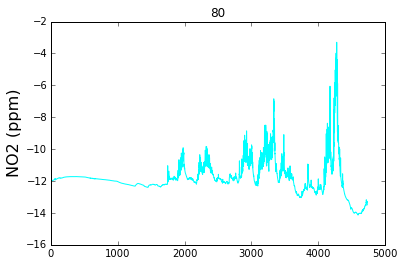

In [222]:
CO_80 = makeR0_NO2(det_NO2,80,'NO2 (ppm)')

count    4.731000e+03
mean    -2.042566e-16
std      2.253193e-01
min     -4.781770e-01
25%     -9.016091e-02
50%     -2.107274e-02
75%      2.641498e-02
max      1.786366e+00
dtype: float64


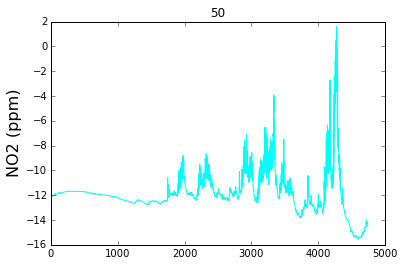

In [223]:
CO_50 = makeR0_NO2(det_NO2,50,'NO2 (ppm)')

count    4.731000e+03
mean    -3.364227e-16
std      3.755322e-01
min     -7.969617e-01
25%     -1.502682e-01
50%     -3.512123e-02
75%      4.402497e-02
max      2.977276e+00
dtype: float64


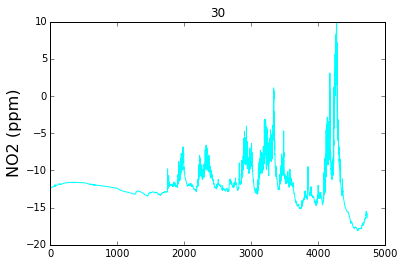

In [224]:
CO_30 = makeR0_NO2(det_NO2,30,'NO2 (ppm)')

count    4.731000e+03
mean    -4.926189e-16
std      5.632982e-01
min     -1.195443e+00
25%     -2.254023e-01
50%     -5.268185e-02
75%      6.603745e-02
max      4.465914e+00
dtype: float64


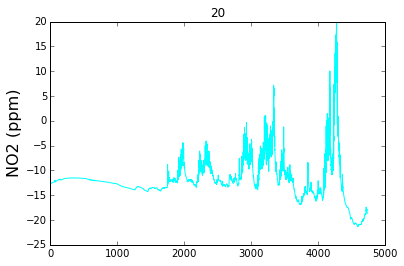

In [225]:
CO_20 = makeR0_NO2(det_NO2,20,'NO2 (ppm)')

count    4.731000e+03
mean    -9.852379e-16
std      1.126596e+00
min     -2.390885e+00
25%     -4.508046e-01
50%     -1.053637e-01
75%      1.320749e-01
max      8.931828e+00
dtype: float64


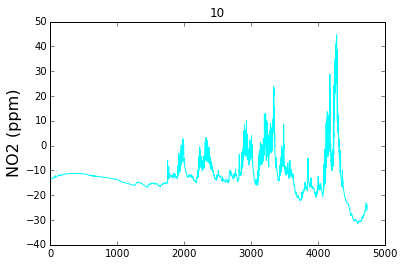

In [226]:
CO_10 = makeR0_NO2(det_NO2,10,'NO2 (ppm)')

count    4.731000e+03
mean    -1.970476e-15
std      2.253193e+00
min     -4.781770e+00
25%     -9.016091e-01
50%     -2.107274e-01
75%      2.641498e-01
max      1.786366e+01
dtype: float64


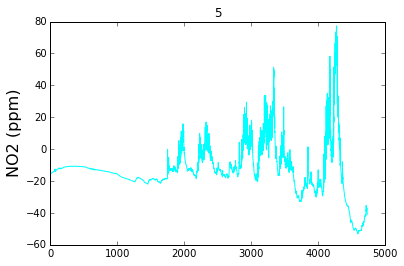

In [227]:
CO_5 = makeR0_NO2(det_NO2,5,'NO2 (ppm)')

count    4.731000e+03
mean    -4.950220e-15
std      5.632982e+00
min     -1.195443e+01
25%     -2.254023e+00
50%     -5.268185e-01
75%      6.603745e-01
max      4.465914e+01
dtype: float64


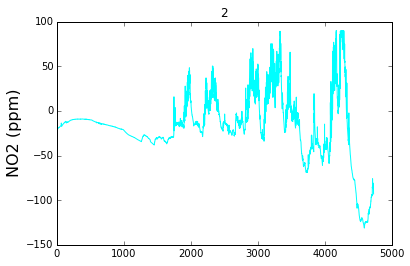

In [228]:
CO_2 = makeR0_NO2(det_NO2,2,'NO2 (ppm)')

In [213]:
print 'average Rs =',np.average(NO2_raw)
print 'So for a R of 3, R0 should be 1/3 Rs'
print 'which is:', np.average(NO2_raw)/3
print 'Thus, according to gas curve, I think we need R0 less than 10'

average Rs = 29.8171781864
So for a R of 3, R0 should be 1/3 Rs
which is: 9.93905939548
Thus, according to gas curve, I think we need R0 less than 10
